In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from IPython.display import Image
from tensorflow.keras.models import load_model

In [2]:
from itertools import cycle
#from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from tensorflow.keras.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001)

In [4]:
train_path = 'D:/MScCS/thesis/Dataset/new/train'
valid_path = 'D:/MScCS/thesis/Dataset/new/test'

In [5]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

densenet = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in densenet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('D:/MScCS/thesis/Dataset/new/train/*')

In [8]:
#layers
x = Flatten()(densenet.output)

In [9]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 14, 14, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)      

 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 14, 14, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 14, 14, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block33_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block33_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 14, 14, 1312  0          ['conv4_block32_concat[0][0]',   
 ate)                           )                                 'conv4_block33_2_conv[0][0]']   
          

                                                                                                  
 conv4_block37_concat (Concaten  (None, 14, 14, 1440  0          ['conv4_block36_concat[0][0]',   
 ate)                           )                                 'conv4_block37_2_conv[0][0]']   
                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 14, 14, 1440  5760       ['conv4_block37_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 14, 14, 1440  0          ['conv4_block38_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_blo

 conv4_block42_0_relu (Activati  (None, 14, 14, 1568  0          ['conv4_block42_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block42_1_conv (Conv2D)  (None, 14, 14, 128)  200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block46_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block46_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 14, 14, 1728  0          ['conv4_block45_concat[0][0]',   
 ate)                           )                                 'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 14, 14, 1728  6912       ['conv4_block46_concat[0][0]']   
 lization)

                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 7, 7, 960)   0           ['conv5_block1_concat[0][0]',    
 te)      

 conv5_block6_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block6_1_relu[0][0]']    
                                                                                                  
 conv5_block6_concat (Concatena  (None, 7, 7, 1088)  0           ['conv5_block5_concat[0][0]',    
 te)                                                              'conv5_block6_2_conv[0][0]']    
                                                                                                  
 conv5_block7_0_bn (BatchNormal  (None, 7, 7, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 7, 7, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block11_0_relu (Activati  (None, 7, 7, 1216)  0           ['conv5_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, 7, 7, 128)    155648      ['conv5_block11_0_relu[0][0]']   
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block15_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 7, 7, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_blo

 conv5_block19_concat (Concaten  (None, 7, 7, 1504)  0           ['conv5_block18_concat[0][0]',   
 ate)                                                             'conv5_block19_2_conv[0][0]']   
                                                                                                  
 conv5_block20_0_bn (BatchNorma  (None, 7, 7, 1504)  6016        ['conv5_block19_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_0_relu (Activati  (None, 7, 7, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 7, 7, 128)    192512      ['conv5_block20_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block24_1_conv (Conv2D)  (None, 7, 7, 128)    208896      ['conv5_block24_0_relu[0][0]']   
                                                                                                  
 conv5_block24_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 conv5_block28_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block28_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block28_1_relu[0][0]']   
                                                                                                  
 conv5_block28_concat (Concaten  (None, 7, 7, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 7, 7, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 bn (BatchNormalization)        (None, 7, 7, 1920)   7680        ['conv5_block32_concat[0][0]']   
                                                                                                  
 relu (Activation)              (None, 7, 7, 1920)   0           ['bn[0][0]']                     
                                                                                                  
 flatten (Flatten)              (None, 94080)        0           ['relu[0][0]']                   
                                                                                                  
 dense (Dense)                  (None, 4)            376324      ['flatten[0][0]']                
                                                                                                  
Total params: 18,698,308
Trainable params: 376,324
Non-trainable params: 18,321,984
_________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [12]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range= 45,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 200 images belonging to 4 classes.


In [23]:
itr = test_datagen.flow_from_directory(
'D:/MScCS/thesis/Dataset/new/test',
target_size=(224,224),
batch_size=8,
class_mode='categorical')

#X, y = itr.next()
x_test, y_test = itr.next()

n_classes = 4
lw = 2

Found 200 images belonging to 4 classes.


In [37]:
classes = ['cocci', 'healthy', 'ncd', 'salmo']
def plot_roc_curve():
    #roc curve plot

    y_score = model.predict(x_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )
    
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()

In [17]:
def plot_loss_acc():
    # plotting the loss
    plt.plot(r.history['loss'], label='train loss')
    plt.plot(r.history['val_loss'], label='val loss')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

    # plotting the accuracy
    plt.plot(r.history['accuracy'], label='train accuracy')
    plt.plot(r.history['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

In [19]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
100/100 [==============================] - 65s 418ms/step - loss: 1.0152 - accuracy: 0.5850 - val_loss: 0.6920 - val_accuracy: 0.7500
Epoch 2/10
100/100 [==============================] - 34s 343ms/step - loss: 0.5234 - accuracy: 0.8125 - val_loss: 0.4578 - val_accuracy: 0.8450
Epoch 3/10
100/100 [==============================] - 35s 347ms/step - loss: 0.3792 - accuracy: 0.8725 - val_loss: 0.3610 - val_accuracy: 0.8700
Epoch 4/10
100/100 [==============================] - 34s 345ms/step - loss: 0.2873 - accuracy: 0.8950 - val_loss: 0.2801 - val_accuracy: 0.8900
Epoch 5/10
100/100 [==============================] - 34s 343ms/step - loss: 0.2464 - accuracy: 0.9125 - val_loss: 0.2518 - val_accuracy: 0.9100
Epoch 6/10
100/100 [==============================] - 34s 345ms/step - loss: 0.2228 - accuracy: 0.9212 - val_loss: 0.2211 - val_accuracy: 0.9150
Epoch 7/10
100/100 [==============================] - 34s 341ms/step - loss: 0.1842 - accuracy: 0.9275 - val_loss: 0.2069 - val_ac

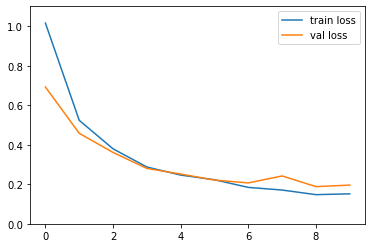

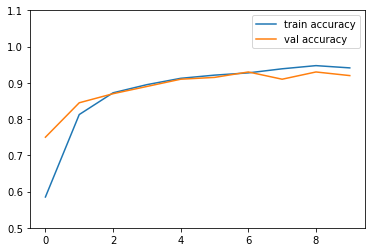

In [32]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.0, 1.1)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(0.5, 1.1)
plt.show()

1/1 [==============================] - 0s 41ms/step


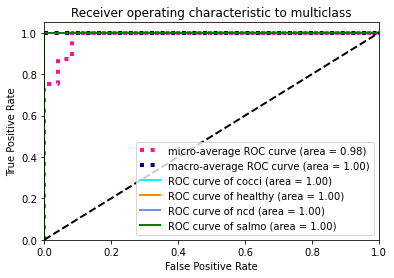

In [33]:
plot_roc_curve()

In [38]:
model.save('./models/densenet201_rmsprop_10.h5')

In [39]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
100/100 [==============================] - 36s 360ms/step - loss: 0.1218 - accuracy: 0.9613 - val_loss: 0.1932 - val_accuracy: 0.9250
Epoch 2/15
100/100 [==============================] - 35s 347ms/step - loss: 0.1051 - accuracy: 0.9688 - val_loss: 0.2104 - val_accuracy: 0.9000
Epoch 3/15
100/100 [==============================] - 35s 346ms/step - loss: 0.1171 - accuracy: 0.9625 - val_loss: 0.1535 - val_accuracy: 0.9400
Epoch 4/15
100/100 [==============================] - 35s 346ms/step - loss: 0.1080 - accuracy: 0.9625 - val_loss: 0.1627 - val_accuracy: 0.9400
Epoch 5/15
100/100 [==============================] - 35s 346ms/step - loss: 0.0931 - accuracy: 0.9725 - val_loss: 0.1367 - val_accuracy: 0.9500
Epoch 6/15
100/100 [==============================] - 35s 353ms/step - loss: 0.0844 - accuracy: 0.9725 - val_loss: 0.1495 - val_accuracy: 0.9400
Epoch 7/15
100/100 [==============================] - 34s 343ms/step - loss: 0.0751 - accuracy: 0.9775 - val_loss: 0.1322 - val_ac

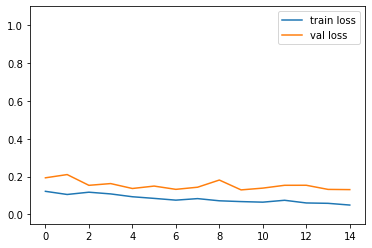

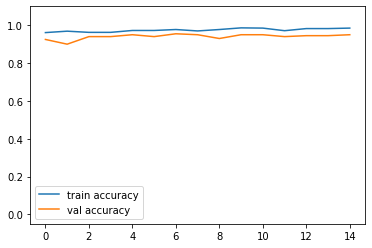

1/1 [==============================] - 0s 41ms/step


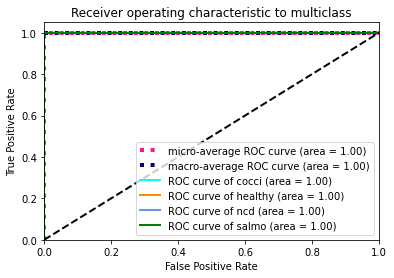

In [40]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_15.h5')

In [45]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
100/100 [==============================] - 40s 395ms/step - loss: 0.0514 - accuracy: 0.9825 - val_loss: 0.1383 - val_accuracy: 0.9450
Epoch 2/20
100/100 [==============================] - 34s 337ms/step - loss: 0.0488 - accuracy: 0.9862 - val_loss: 0.1239 - val_accuracy: 0.9500
Epoch 3/20
100/100 [==============================] - 34s 335ms/step - loss: 0.0423 - accuracy: 0.9887 - val_loss: 0.1182 - val_accuracy: 0.9550
Epoch 4/20
100/100 [==============================] - 33s 335ms/step - loss: 0.0491 - accuracy: 0.9837 - val_loss: 0.1293 - val_accuracy: 0.9550
Epoch 5/20
100/100 [==============================] - 34s 341ms/step - loss: 0.0562 - accuracy: 0.9812 - val_loss: 0.1142 - val_accuracy: 0.9550
Epoch 6/20
100/100 [==============================] - 34s 337ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.1246 - val_accuracy: 0.9500
Epoch 7/20
100/100 [==============================] - 33s 333ms/step - loss: 0.0453 - accuracy: 0.9825 - val_loss: 0.1206 - val_ac

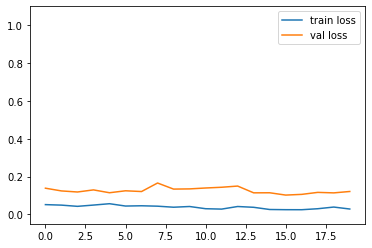

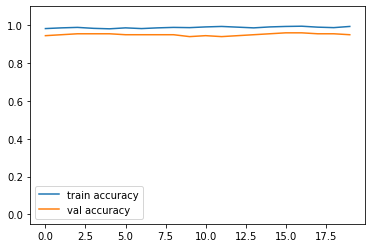

1/1 [==============================] - 0s 41ms/step


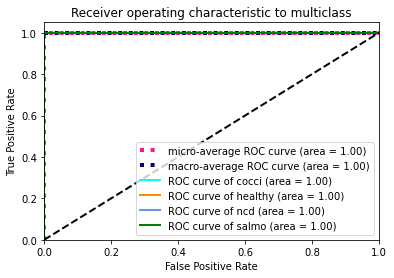

In [46]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_20.h5')

In [51]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
100/100 [==============================] - 36s 354ms/step - loss: 0.0231 - accuracy: 0.9937 - val_loss: 0.1475 - val_accuracy: 0.9500
Epoch 2/25
100/100 [==============================] - 36s 360ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.1473 - val_accuracy: 0.9450
Epoch 3/25
100/100 [==============================] - 35s 345ms/step - loss: 0.0242 - accuracy: 0.9937 - val_loss: 0.1178 - val_accuracy: 0.9600
Epoch 4/25
100/100 [==============================] - 35s 345ms/step - loss: 0.0207 - accuracy: 0.9975 - val_loss: 0.1260 - val_accuracy: 0.9500
Epoch 5/25
100/100 [==============================] - 35s 354ms/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.1164 - val_accuracy: 0.9550
Epoch 6/25
100/100 [==============================] - 40s 400ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.1243 - val_accuracy: 0.9500
Epoch 7/25
100/100 [==============================] - 36s 361ms/step - loss: 0.0206 - accuracy: 0.9912 - val_loss: 0.0960 - val_ac

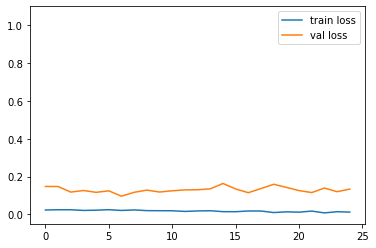

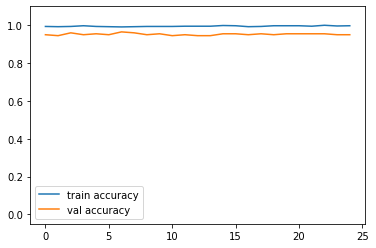

1/1 [==============================] - 0s 42ms/step


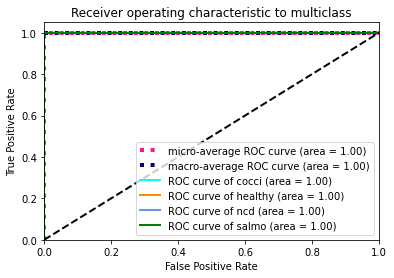

In [52]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_25.h5')

In [57]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
100/100 [==============================] - 35s 344ms/step - loss: 0.0131 - accuracy: 0.9975 - val_loss: 0.1352 - val_accuracy: 0.9550
Epoch 2/30
100/100 [==============================] - 34s 344ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.1399 - val_accuracy: 0.9450
Epoch 3/30
100/100 [==============================] - 34s 343ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.1526 - val_accuracy: 0.9450
Epoch 4/30
100/100 [==============================] - 34s 340ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.1367 - val_accuracy: 0.9500
Epoch 5/30
100/100 [==============================] - 35s 348ms/step - loss: 0.0132 - accuracy: 0.9950 - val_loss: 0.1257 - val_accuracy: 0.9600
Epoch 6/30
100/100 [==============================] - 35s 347ms/step - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.1312 - val_accuracy: 0.9600
Epoch 7/30
100/100 [==============================] - 35s 348ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.1434 - val_ac

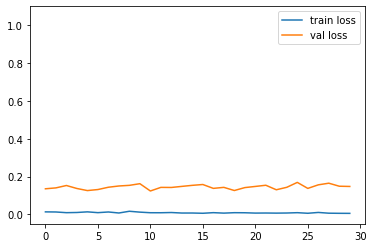

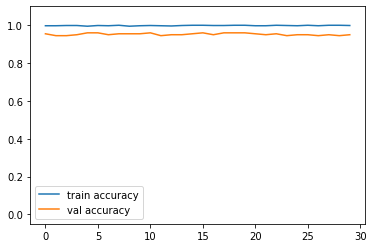

1/1 [==============================] - 0s 42ms/step


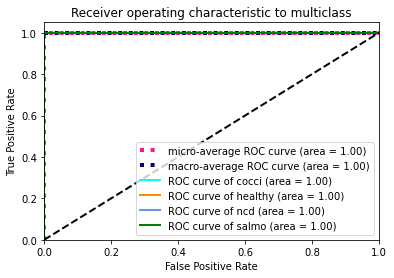

In [58]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_30.h5')

In [63]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/35
100/100 [==============================] - 39s 390ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1471 - val_accuracy: 0.9500
Epoch 2/35
100/100 [==============================] - 41s 409ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.1313 - val_accuracy: 0.9600
Epoch 3/35
100/100 [==============================] - 39s 390ms/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.1654 - val_accuracy: 0.9450
Epoch 4/35
100/100 [==============================] - 39s 390ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1864 - val_accuracy: 0.9550
Epoch 5/35
100/100 [==============================] - 37s 371ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9500
Epoch 6/35
100/100 [==============================] - 36s 363ms/step - loss: 0.0065 - accuracy: 0.9975 - val_loss: 0.1376 - val_accuracy: 0.9450
Epoch 7/35
100/100 [==============================] - 36s 358ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1489 - val_ac

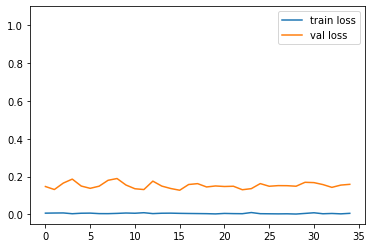

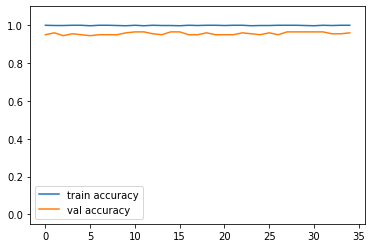

1/1 [==============================] - 0s 44ms/step


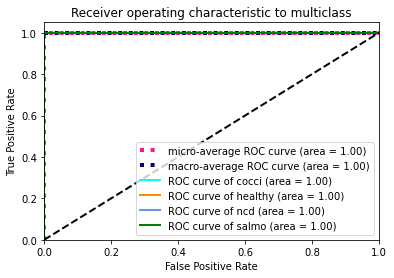

In [64]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_35.h5')

In [68]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
100/100 [==============================] - 36s 362ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.1523 - val_accuracy: 0.9500
Epoch 2/40
100/100 [==============================] - 36s 362ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.1399 - val_accuracy: 0.9600
Epoch 3/40
100/100 [==============================] - 37s 365ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.1471 - val_accuracy: 0.9500
Epoch 4/40
100/100 [==============================] - 35s 347ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.1619 - val_accuracy: 0.9550
Epoch 5/40
100/100 [==============================] - 35s 345ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1674 - val_accuracy: 0.9550
Epoch 6/40
100/100 [==============================] - 35s 346ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.1696 - val_accuracy: 0.9550
Epoch 7/40
100/100 [==============================] - 35s 350ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1396 - val_ac

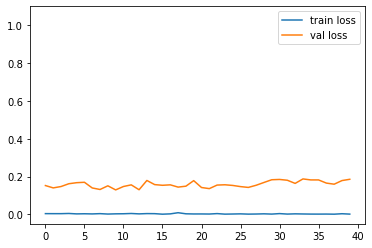

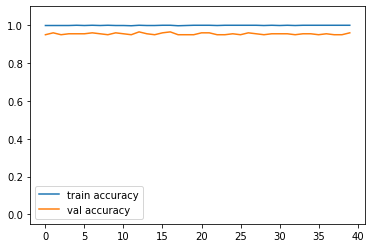

1/1 [==============================] - 0s 43ms/step


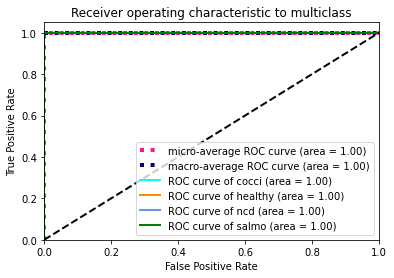

In [69]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_40.h5')

In [74]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=45,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/45
100/100 [==============================] - 35s 350ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1700 - val_accuracy: 0.9500
Epoch 2/45
100/100 [==============================] - 35s 349ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1634 - val_accuracy: 0.9600
Epoch 3/45
100/100 [==============================] - 35s 348ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.1619 - val_accuracy: 0.9650
Epoch 4/45
100/100 [==============================] - 35s 348ms/step - loss: 5.6835e-04 - accuracy: 1.0000 - val_loss: 0.1612 - val_accuracy: 0.9550
Epoch 5/45
100/100 [==============================] - 35s 349ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1807 - val_accuracy: 0.9550
Epoch 6/45
100/100 [==============================] - 35s 348ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1593 - val_accuracy: 0.9500
Epoch 7/45
100/100 [==============================] - 35s 348ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1531 - va

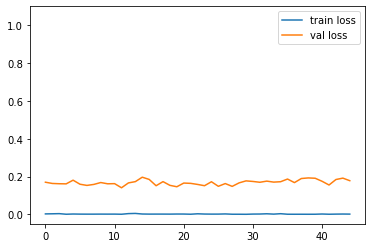

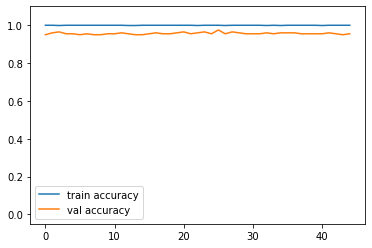

1/1 [==============================] - 0s 44ms/step


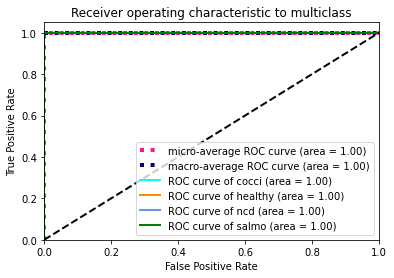

In [75]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_45.h5')

In [80]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
100/100 [==============================] - 34s 341ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.1818 - val_accuracy: 0.9550
Epoch 2/50
100/100 [==============================] - 34s 339ms/step - loss: 4.8929e-04 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9700
Epoch 3/50
100/100 [==============================] - 34s 338ms/step - loss: 0.0022 - accuracy: 0.9987 - val_loss: 0.1615 - val_accuracy: 0.9600
Epoch 4/50
100/100 [==============================] - 34s 341ms/step - loss: 8.0807e-04 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0.9700
Epoch 5/50
100/100 [==============================] - 34s 339ms/step - loss: 0.0021 - accuracy: 0.9987 - val_loss: 0.1632 - val_accuracy: 0.9600
Epoch 6/50
100/100 [==============================] - 34s 338ms/step - loss: 6.0878e-04 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9700
Epoch 7/50
100/100 [==============================] - 34s 339ms/step - loss: 8.5278e-04 - accuracy: 1.0000 - val_loss:

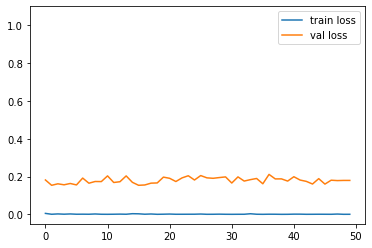

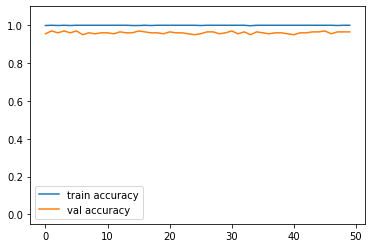

1/1 [==============================] - 0s 42ms/step


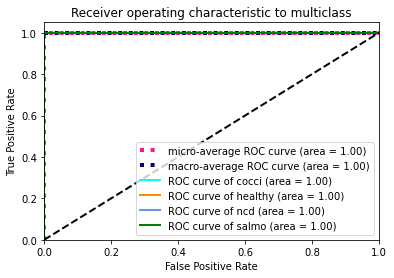

In [81]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_50.h5')

In [18]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=60,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/60
100/100 [==============================] - 73s 540ms/step - loss: 1.0504 - accuracy: 0.5475 - val_loss: 0.8425 - val_accuracy: 0.6950
Epoch 2/60
100/100 [==============================] - 38s 383ms/step - loss: 0.5459 - accuracy: 0.8138 - val_loss: 0.5638 - val_accuracy: 0.7950
Epoch 3/60
100/100 [==============================] - 38s 385ms/step - loss: 0.3937 - accuracy: 0.8763 - val_loss: 0.4054 - val_accuracy: 0.8550
Epoch 4/60
100/100 [==============================] - 38s 384ms/step - loss: 0.2953 - accuracy: 0.9013 - val_loss: 0.3430 - val_accuracy: 0.8850
Epoch 5/60
100/100 [==============================] - 38s 384ms/step - loss: 0.2434 - accuracy: 0.9225 - val_loss: 0.2854 - val_accuracy: 0.9000
Epoch 6/60
100/100 [==============================] - 38s 378ms/step - loss: 0.2068 - accuracy: 0.9300 - val_loss: 0.2548 - val_accuracy: 0.9100
Epoch 7/60
100/100 [==============================] - 38s 377ms/step - loss: 0.2001 - accuracy: 0.9312 - val_loss: 0.2671 - val_ac

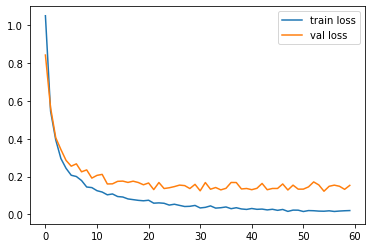

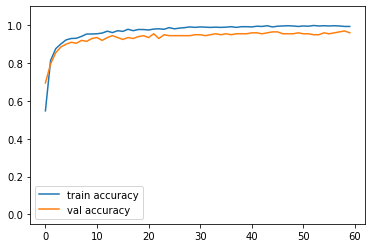

In [20]:
plot_loss_acc()
#plot_roc_curve()
model.save('./models/densenet201_rmsprop_60.h5')

1/1 [==============================] - 0s 41ms/step


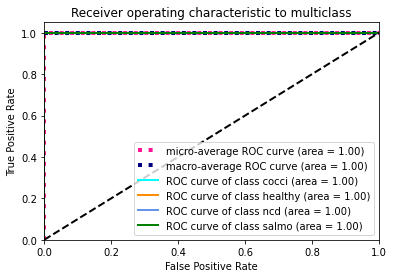

In [25]:
plot_roc_curve()

In [30]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=70,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/70
100/100 [==============================] - 36s 355ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.1186 - val_accuracy: 0.9650
Epoch 2/70
100/100 [==============================] - 34s 340ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.9550
Epoch 3/70
100/100 [==============================] - 39s 395ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1552 - val_accuracy: 0.9650
Epoch 4/70
100/100 [==============================] - 42s 417ms/step - loss: 0.0177 - accuracy: 0.9937 - val_loss: 0.1474 - val_accuracy: 0.9650
Epoch 5/70
100/100 [==============================] - 37s 372ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.1606 - val_accuracy: 0.9650
Epoch 6/70
100/100 [==============================] - 36s 364ms/step - loss: 0.0139 - accuracy: 0.9987 - val_loss: 0.1544 - val_accuracy: 0.9650
Epoch 7/70
100/100 [==============================] - 35s 346ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.1263 - val_ac

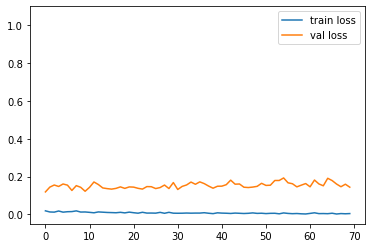

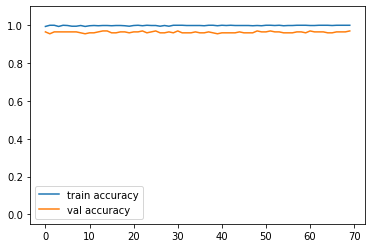

1/1 [==============================] - 0s 41ms/step


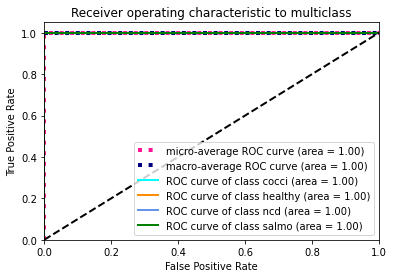

In [31]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_70.h5')

In [36]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
100/100 [==============================] - 35s 350ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1734 - val_accuracy: 0.9600
Epoch 2/80
100/100 [==============================] - 34s 344ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1497 - val_accuracy: 0.9600
Epoch 3/80
100/100 [==============================] - 35s 348ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1622 - val_accuracy: 0.9650
Epoch 4/80
100/100 [==============================] - 35s 345ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1621 - val_accuracy: 0.9650
Epoch 5/80
100/100 [==============================] - 34s 345ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1669 - val_accuracy: 0.9650
Epoch 6/80
100/100 [==============================] - 34s 345ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.1906 - val_accuracy: 0.9600
Epoch 7/80
100/100 [==============================] - 35s 345ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1645 - val_ac

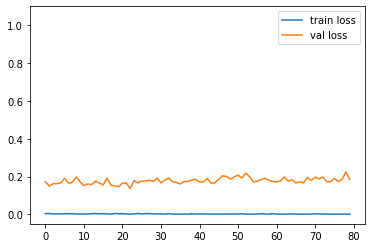

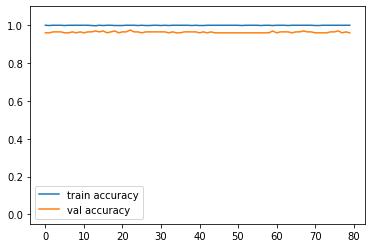

1/1 [==============================] - 0s 42ms/step


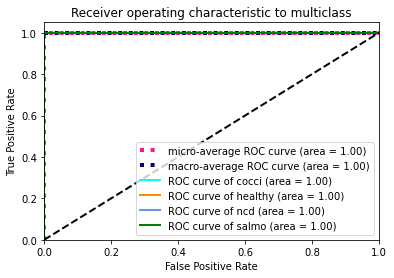

In [38]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_80.h5')

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_90.h5')

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/densenet201_rmsprop_100.h5')

In [42]:
path = 'D:/MScCS/thesis/Dataset/new/separate testing/salmo/'
count = 0
for i in os.listdir(path):
    filename = path + i
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224, 224))

    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.densenet.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    #print(np.argmax(predictions))
    category = np.argmax(predictions)
    if(category == 3):
        count = count + 1
        
print('Total accurate prediction for cocci:', count)

1/1 [==============================] - 0s 42ms/step
Total accurate prediction for cocci: 21


In [ ]:
# epoch 35 - 74
# epoch 10 - 76
# epoch 15,20,25,30,40,45,60,70,80 - 75
# epoch 50 - 77